## IMPORT PACKAGES & LOAD DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mod1 = pd.read_csv("mod1.csv")
mod1.shape

(1241, 22)

## DATA UNDERSTANDING

In [4]:
mod1.head()

,STUDENT ID,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,...,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,2019/2020|MS1918176789,0,1,1,3,0,2,1,1,6,...,6,5,5,3,1,2,1,1,2,1
1,2019/2020|MS1818177321,0,1,2,3,0,2,1,0,1,...,5,4,6,5,1,1,4,2,5,1
2,2019/2020|MS1918177022,0,1,1,3,0,2,1,1,7,...,7,2,4,5,1,4,1,3,3,1
3,2019/2020|MS1818177340,0,1,2,3,0,2,8,2,2,...,5,3,6,4,2,3,5,4,1,2
4,2019/2020|MS1818177124,0,1,2,3,0,2,1,2,3,...,3,4,6,5,1,1,5,3,2,1


In [5]:
mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   STUDENT ID      1241 non-null   object
 1   LEARNING STYLE  1241 non-null   int64 
 2   PROGRAM         1241 non-null   int64 
 3   YEAR            1241 non-null   int64 
 4   RACE            1241 non-null   int64 
 5   GENDER          1241 non-null   int64 
 6   RELIGION        1241 non-null   int64 
 7   STATE           1241 non-null   int64 
 8   REGION          1241 non-null   int64 
 9   INCOME          1241 non-null   int64 
 10  DEPENDENTS      1241 non-null   int64 
 11  SCHOOL          1241 non-null   int64 
 12  SPM ADDMATH     1241 non-null   int64 
 13  SPM PHY         1241 non-null   int64 
 14  SPM CHEM        1241 non-null   int64 
 15  SPM BIO         1241 non-null   int64 
 16  SEM1 CGPA       1241 non-null   int64 
 17  SEM1 MATH       1241 non-null   int64 
 18  SEM1 PHY

In [6]:
#DROP 'STUDENT ID' COLUMN
mod1 = mod1.drop(["STUDENT ID"],axis=1)

In [7]:
mod1.isnull().sum()

LEARNING STYLE    0
PROGRAM           0
YEAR              0
RACE              0
GENDER            0
RELIGION          0
STATE             0
REGION            0
INCOME            0
DEPENDENTS        0
SCHOOL            0
SPM ADDMATH       0
SPM PHY           0
SPM CHEM          0
SPM BIO           0
SEM1 CGPA         0
SEM1 MATH         0
SEM1 PHY          0
SEM1 CHEM         0
SEM1 BIO          0
SEM2 CGPA         0
dtype: int64

In [8]:
mod1.head()

,LEARNING STYLE,PROGRAM,YEAR,RACE,GENDER,RELIGION,STATE,REGION,INCOME,DEPENDENTS,...,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,0,1,1,3,0,2,1,1,6,6,...,6,5,5,3,1,2,1,1,2,1
1,0,1,2,3,0,2,1,0,1,6,...,5,4,6,5,1,1,4,2,5,1
2,0,1,1,3,0,2,1,1,7,2,...,7,2,4,5,1,4,1,3,3,1
3,0,1,2,3,0,2,8,2,2,6,...,5,3,6,4,2,3,5,4,1,2
4,0,1,2,3,0,2,1,2,3,4,...,3,4,6,5,1,1,5,3,2,1


## TRAIN_TEST_SPLIT

In [9]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod1.drop(labels=['SEM2 CGPA'],axis=1),
                                                 mod1['SEM2 CGPA'],test_size=0.3,random_state=0)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 959 to 684
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  868 non-null    int64
 1   PROGRAM         868 non-null    int64
 2   YEAR            868 non-null    int64
 3   RACE            868 non-null    int64
 4   GENDER          868 non-null    int64
 5   RELIGION        868 non-null    int64
 6   STATE           868 non-null    int64
 7   REGION          868 non-null    int64
 8   INCOME          868 non-null    int64
 9   DEPENDENTS      868 non-null    int64
 10  SCHOOL          868 non-null    int64
 11  SPM ADDMATH     868 non-null    int64
 12  SPM PHY         868 non-null    int64
 13  SPM CHEM        868 non-null    int64
 14  SPM BIO         868 non-null    int64
 15  SEM1 CGPA       868 non-null    int64
 16  SEM1 MATH       868 non-null    int64
 17  SEM1 PHY        868 non-null    int64
 18  SEM1 CHEM       868 non-null

In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 1031 to 825
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LEARNING STYLE  373 non-null    int64
 1   PROGRAM         373 non-null    int64
 2   YEAR            373 non-null    int64
 3   RACE            373 non-null    int64
 4   GENDER          373 non-null    int64
 5   RELIGION        373 non-null    int64
 6   STATE           373 non-null    int64
 7   REGION          373 non-null    int64
 8   INCOME          373 non-null    int64
 9   DEPENDENTS      373 non-null    int64
 10  SCHOOL          373 non-null    int64
 11  SPM ADDMATH     373 non-null    int64
 12  SPM PHY         373 non-null    int64
 13  SPM CHEM        373 non-null    int64
 14  SPM BIO         373 non-null    int64
 15  SEM1 CGPA       373 non-null    int64
 16  SEM1 MATH       373 non-null    int64
 17  SEM1 PHY        373 non-null    int64
 18  SEM1 CHEM       373 non-nul

In [12]:
y_train.head()

959     1
200     1
1093    1
65      2
1128    1
Name: SEM2 CGPA, dtype: int64

In [13]:
y_test.head()

1031    0
124     0
184     1
766     4
18      1
Name: SEM2 CGPA, dtype: int64

In [33]:
mod1.dtypes

STUDENT ID        object
LEARNING STYLE     int64
PROGRAM            int64
YEAR               int64
RACE               int64
GENDER             int64
RELIGION           int64
STATE              int64
REGION             int64
INCOME             int64
DEPENDENTS         int64
SCHOOL             int64
SPM ADDMATH        int64
SPM PHY            int64
SPM CHEM           int64
SPM BIO            int64
SEM1 CGPA          int64
SEM1 MATH          int64
SEM1 PHY           int64
SEM1 CHEM          int64
SEM1 BIO           int64
SEM2 CGPA          int64
dtype: object

## MODELLING : DECISION TREE

## VISUALIZING THE DATA

(21.5, -0.5)

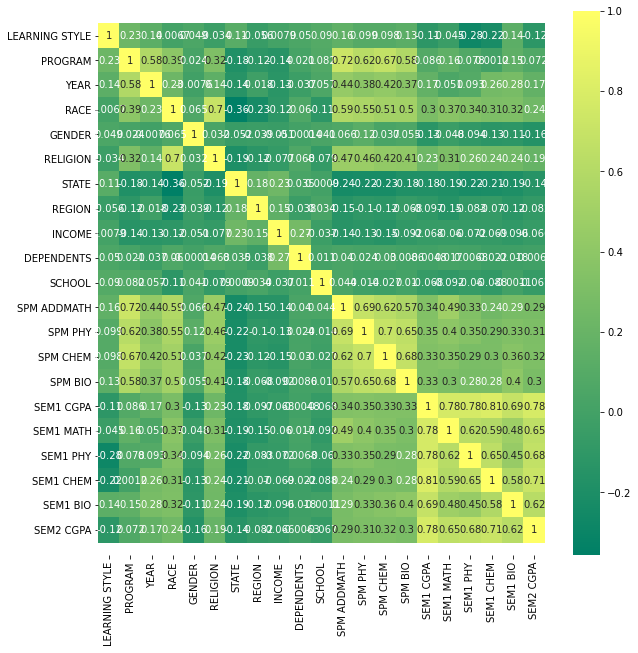

In [34]:
import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(10,10))
ax = sns.heatmap(mod1.corr(),annot=True,cmap='summer', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:xlabel='SEM2 CGPA', ylabel='count'>

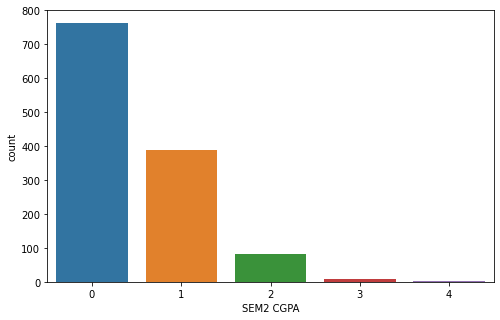

In [42]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="SEM2 CGPA", data=mod1)

## DATA PREPARATION

## EVALUATION

In [51]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0 , criterion = 'entropy').fit(x_train, y_train)
score = cross_val_score(dtree, x_train, y_train, cv=10, scoring='accuracy')
print(score)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


ValueError: could not convert string to float: '2019/2020|MS1918176789'

In [50]:
# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<=50k','>50k'], 
                     columns = ['<=50k','>50k'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'dtree' is not defined